In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

In [2]:
class FunctionIntegrator:
    # This class is designed to handle function integration using Monte Carlo methods
    # and visualize the function and its area under the curve.

    def __init__(self, func, title="Function", xRange=(-10, 10), subIntervals=500):
        """
        Initializes the FunctionIntegrator class with the given parameters.
        
        :param func: The function to be integrated.
        :param title: Title for the plot.
        :param xRange: The range of x-values for plotting and integration.
        :param subIntervals: Number of intervals for the x-values in the plot (used for plotting).
        """
        self.func = func  # The function to be integrated
        self.title = title  # Title for the plot
        self.xRange = xRange  # Range of x-values for the integration and plotting
        self.subIntervals = subIntervals  # Number of intervals used for plotting
        self.monteCarloIntegral = None  # Stores the result of the Monte Carlo integration

    def plot(self, xLabel="x", yLabel="f(x)"):
        """
        Plots the function and fills the area under the curve. If the Monte Carlo integral 
        is available, it is displayed in the plot label.
        
        :param xLabel: Label for the x-axis.
        :param yLabel: Label for the y-axis.
        """
        # Create a set of x values to plot (linearly spaced values)
        x = np.linspace(self.xRange[0], self.xRange[1], self.subIntervals)
        
        # Compute the corresponding y values using the provided function
        y = np.vectorize(self.func)(x)

        # Create the plot
        plt.figure(figsize=(8, 6))
        
        # Plot the function f(x)
        plt.plot(x, y, label=yLabel, color="blue")
        
        # Label for the area under the curve, based on whether Monte Carlo result exists
        if self.monteCarloIntegral is None:
            label = "Area under f(x)"
        else:
            label = f"Area under f(x): {round(self.monteCarloIntegral, 5)}"

        # Fill the area under the curve with a semi-transparent color
        plt.fill_between(x, y, color='skyblue', alpha=0.5, label=label)
        
        # Set the title and labels for the axes
        plt.title(self.title)
        plt.xlabel(xLabel)
        plt.ylabel(yLabel)
        
        # Add horizontal and vertical lines at y=0 and x=0 respectively
        plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
        plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
        
        # Add a grid to the plot
        plt.grid(alpha=0.3)
        
        # Display the legend for the plot
        plt.legend()
        
        # Show the plot
        plt.show()

    def monteCarloIntegration(self, nIterations=1e5, seed=None):
        """
        Estimates the integral of the function using Monte Carlo integration.
        
        :param nIterations: Number of random iterations to perform (default is 100,000).
        :param seed: Seed for the random number generator (for reproducibility).
        :return: The estimated area under the curve (integral).
        """
        
        nIterations = int(nIterations)  # Convert nIterations to an integer
        
        # Set the seed for the random number generator if provided
        if seed is not None:
            np.random.seed(seed)

        inArea = 0  # Counter for the number of points that fall under the curve
        
        # Generate x values in the specified range for the function
        x = np.linspace(self.xRange[0], self.xRange[1], self.subIntervals)
        
        # Compute y values corresponding to the function for the x values
        yValues = self.func(x)

        # Find the minimum and maximum y values of the function to define the y-range
        yRange = (min(yValues), max(yValues))

        # Compute the area of the rectangle that bounds the function for Monte Carlo
        rangeArea = abs(self.xRange[1] - self.xRange[0]) * abs(yRange[1] - yRange[0])

        for _ in range(nIterations):
            # Generate random x and y coordinates within the defined ranges
            xCoordinate = np.random.uniform(self.xRange[0], self.xRange[1])
            yCoordinate = np.random.uniform(yRange[0], yRange[1])

            # Check if the random point lies under the curve
            if yCoordinate <= self.func(xCoordinate):
                inArea += 1
        
        # Estimate the integral by multiplying the ratio of points under the curve by the area
        result = (inArea / nIterations) * rangeArea

        # Store the Monte Carlo result
        self.monteCarloIntegral = result
        
        # Return the estimated integral (area under the curve)
        return result

    def parameterGrid(self, iterationsList, analyticalIntegral=None, seed=None):
        """
        Performs Monte Carlo integration over a grid of iterations and returns the results in a DataFrame.
        
        :param iterationsList: List of iteration counts for each Monte Carlo estimation.
        :param analyticalIntegral: Optional, the analytical solution of the integral.
        :param seed: Seed for the random number generator (for reproducibility).
        :return: DataFrame containing the results of the Monte Carlo integrations.
        """
        # Initialize an empty DataFrame to store the results of each Monte Carlo estimation
        df = pd.DataFrame(index=iterationsList, columns=["Monte Carlo Integral"])

        df.index.name = "numIterations"  # Set the index name to represent number of iterations

        # Loop through each iteration value and perform Monte Carlo integration
        for iterations in iterationsList:
            # Perform Monte Carlo integration and store the result in the DataFrame
            df.at[iterations, "Monte Carlo Integral"] = self.monteCarloIntegration(nIterations=iterations, seed=seed)
        
        # Format the index values in scientific notation
        df.index = df.index.map(lambda x: f'{x:.2e}')

        if analyticalIntegral is not None:
            # If the analytical integral is provided, calculate the relative error
            df["Analytical Integral"] = analyticalIntegral
            df["Relative Error (%)"] = ((df["Monte Carlo Integral"] / df["Analytical Integral"] - 1) * 100)

        # Return the DataFrame containing the results
        return df

Estimated Area under the curve: 1.786820951033714
Analytical value: 1.7724538509055159
Relative error: 0.8106%


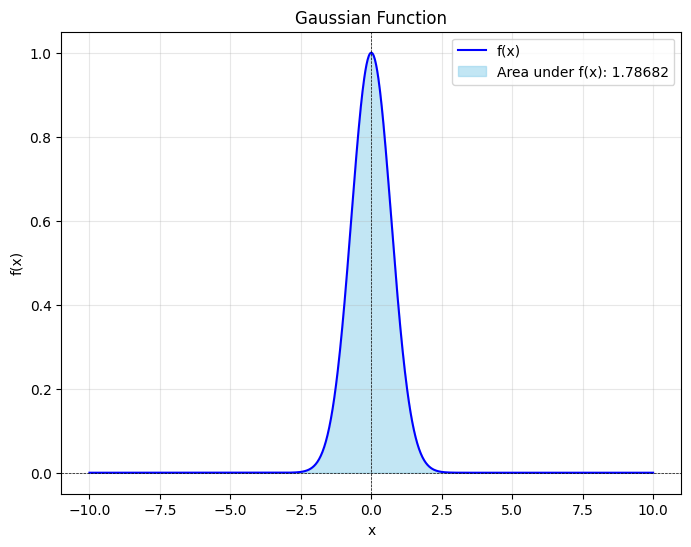

,Monte Carlo Integral,Analytical Integral,Relative Error (%)
numIterations,,,
1.00e+05,1.786821,1.772454,0.810577
1.00e+06,1.764623,1.772454,-0.441799
1.00e+07,1.771554,1.772454,-0.050742


In [3]:
# Define the Gaussian function: f(x) = exp(-x^2)
def gaussian(x):
    """
    Gaussian function that returns the value of exp(-x^2) for a given x.
    
    :param x: Input value to the function.
    :return: The value of exp(-x^2).
    """
    return np.exp(-x**2)

# Create an instance of FunctionIntegrator for the Gaussian function
gaussianIntegrator = FunctionIntegrator(
    gaussian,  # Function to be integrated
    title="Gaussian Function",  # Title for the plot
    xRange=(-10, 10),  # x-range for plotting and integration
    subIntervals=1000  # Number of intervals used for plotting
)

# Perform Monte Carlo integration with 100,000 iterations and a random seed of 1
# This estimates the area under the curve of the Gaussian function
area = gaussianIntegrator.monteCarloIntegration(nIterations=1e5, seed=1)

# Print the estimated area under the Gaussian curve
# The analytical solution for the integral of exp(-x^2) from -∞ to ∞ is sqrt(pi)
analyticalIntegral = np.sqrt(np.pi)

# Output the results: estimated area, analytical value, and relative error
print(f"Estimated Area under the curve: {area}")
print(f"Analytical value: {analyticalIntegral}")
print(f"Relative error: {100 * (area/analyticalIntegral - 1):.4f}%")

# Plot the Gaussian function using the FunctionIntegrator instance
# The plot will show the Gaussian function with a range of x-values from -10 to 10
gaussianIntegrator.plot()

# Generate a list of iteration counts
iterationsList = [1e5, 1e6, 1e7]

# Perform Monte Carlo integration for each value in iterationsList and store the results in a DataFrame
df = gaussianIntegrator.parameterGrid(iterationsList, analyticalIntegral, seed=1)

# Display the results DataFrame containing Monte Carlo integrals and relative errors
df